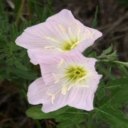

In [3]:
import torchvision
import torch
from PIL import Image
# python 3.12.8
# Create a vector of zeros of size 5
size = (128, 128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = list(torchvision.datasets.Flowers102("./flowers", "train", transform=transform, download=True))
test_dataset = list(torchvision.datasets.Flowers102("./flowers", "test", transform=transform, download=True))

def visualize_image(img: torch.Tensor) -> Image.Image:
    return Image.fromarray((img.permute(1, 2, 0) * 255).to(torch.uint8).numpy())
visualize_image(train_dataset[4][0])

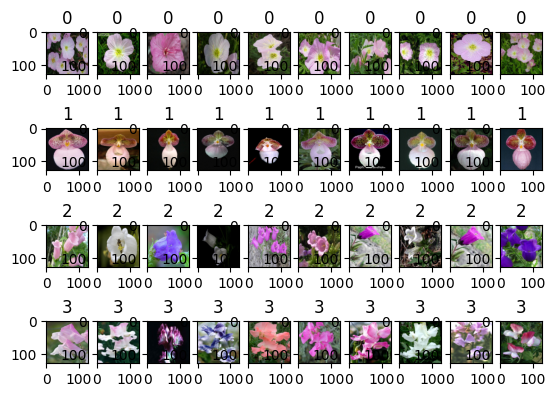

In [5]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(4, 10)
for i, (im, l) in enumerate(list(train_dataset)[:40]):
    ax[i // 10, i % 10].imshow(visualize_image(im))
    ax[i // 10, i % 10].set_title(l)

class_01 = list(train_dataset)[:20]


## Nearest Neighbor Classifier

$f: \mathbb{R} \to \{0, 1\}$

- Input $x$
- Find *closest* data point $(\tilde x, lbl) \in \mathcal{D}$ in dataset $\mathcal{D}$
- Return its label $lbl$

In [11]:
# nearest neighbor classifier of x
def nn_classifier(x):
    # first we need to find distances between all sort of images and our input x
    dist =[((x - im).pow(2).sum().sqrt(), l) for im, l in class_01]
    # the distance is simply just the input minus the img squared, sum over the entired image
    print(dist[1])
    return min(dist)[1]
nn_classifier(test_dataset[0][0])

# accuracy = sum(nn_classifier(x) == l for x, l in list(test_dataset)[:20]) / 20

(tensor(58.3366), 0)


1

In [5]:
[l for _, l in list(test_dataset)[:20]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## K Nearest Neighbor Classifier

$f: \mathbb{R} \to \{0, 1\}$

- Input $x$
- Find k *closest* data points in dataset $\mathcal{D}$
- Return most common label

In [7]:
def knn_classifier(x, k=3):
    # the distances is the idstance between the test image and all the training images
    # instead of looking at the closest, now we look at the k closest
    # the easiest way to do this is to sort the distances, look at the first k
    dist = [((x - im).pow(2).sum(), l) for im, l in class_01]
    k_closest = [l for _, l in sorted(dist)[:k]]
    return (sorted(k_closest)[k//2])
knn_classifier(test_dataset[3][0])

# accuracy = sum(knn_classifier(x) == l for x, l in list(test_dataset)[:20]) / 20
# print(accuracy)

1

## K Nearest Neighbor Regression

$f: \mathbb{R} \to \mathbb{R}$

- Input $x$
- Find k *closest* data points in dataset $\mathcal{D}$
- Return average value

In [ ]:
def knn_regression(x, k=3):
    dist = [((x - im).pow(2).sum(), l) for im, l in class_01]
    k_closest = [l for _, l in sorted(dist)[:k]]
    return torch.mean(torch.tensor(k_closest).float())

knn_regression(test_dataset[3][0])

tensor(0.6667)